In [5]:
import numpy as np
from sklearn.linear_model import Ridge
from data.parameters import XI_16

In [25]:
data=np.array(XI_16)

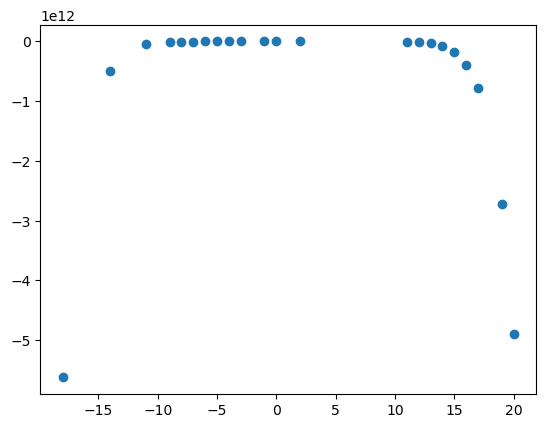

In [31]:
# plot data
plt.scatter(x, y)

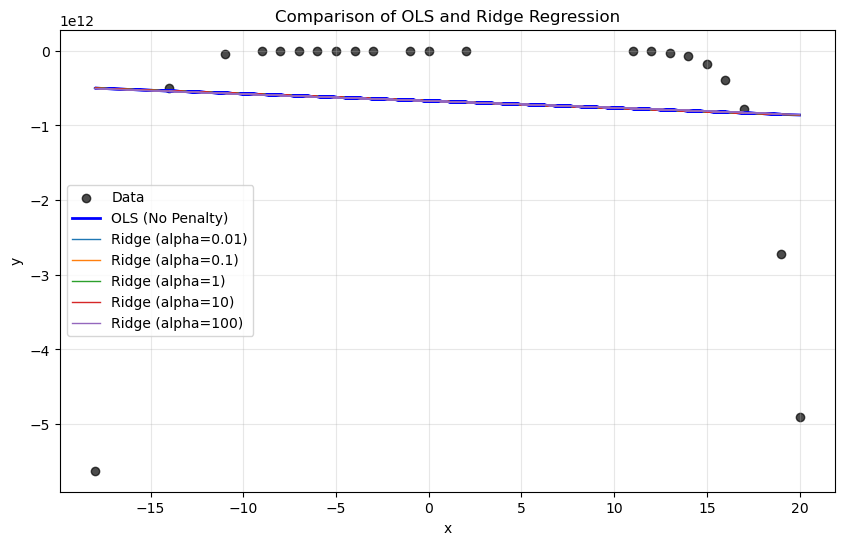

Mean Squared Errors:
OLS: 2420415553066883170172928.000
Ridge (alpha=0.01): 2420415553067020609126400.000
Ridge (alpha=0.1): 2420415553080652835323904.000
Ridge (alpha=1): 2420415554443019145969664.000
Ridge (alpha=10): 2420415689847542172876800.000
Ridge (alpha=100): 2420428438198892833538048.000


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


x=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)


# Define penalties for Ridge regression
penalties = [0.01, 0.1, 1, 10, 100]

# Fit an OLS model
ols_model = LinearRegression()
ols_model.fit(x, y)
ols_y_pred = ols_model.predict(x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Data', alpha=0.7)
plt.plot(x, ols_y_pred, label='OLS (No Penalty)', linewidth=2, color='blue')

# Fit Ridge models for various penalties
for alpha in penalties:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x, y)
    ridge_y_pred = ridge_model.predict(x)
    plt.plot(x, ridge_y_pred, label=f'Ridge (alpha={alpha})', linewidth=1)

# Configure plot
plt.title('Comparison of OLS and Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Evaluate models
print("Mean Squared Errors:")
print(f"OLS: {mean_squared_error(y, ols_y_pred):.3f}")
for alpha in penalties:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x, y)
    ridge_y_pred = ridge_model.predict(x)
    mse = mean_squared_error(y, ridge_y_pred)
    print(f"Ridge (alpha={alpha}): {mse:.3f}")
